## Task 1 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading dataset
df = pd.read_csv('AQI_various_locations.csv')
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",24-05-2024 11:00:00,14.675886,77.593027,SO2,6.0,9.0,7.0
1,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",24-05-2024 11:00:00,14.675886,77.593027,CO,27.0,62.0,37.0
2,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",24-05-2024 11:00:00,13.204880,79.097889,SO2,8.0,18.0,12.0
3,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",24-05-2024 11:00:00,14.465052,78.824187,PM2.5,NaN,NaN,NaN
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",24-05-2024 11:00:00,14.465052,78.824187,SO2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
3067,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",24-05-2024 11:00:00,22.627847,88.380669,NO2,24.0,25.0,24.0
3068,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",24-05-2024 11:00:00,22.627847,88.380669,SO2,4.0,7.0,6.0
3069,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",24-05-2024 11:00:00,26.687923,88.415250,NO2,20.0,33.0,27.0
3070,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",24-05-2024 11:00:00,26.687923,88.415250,NH3,8.0,12.0,10.0


In [4]:
df.shape

(3072, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3072 non-null   object 
 1   state          3072 non-null   object 
 2   city           3072 non-null   object 
 3   station        3072 non-null   object 
 4   last_update    3072 non-null   object 
 5   latitude       3072 non-null   float64
 6   longitude      3072 non-null   float64
 7   pollutant_id   3072 non-null   object 
 8   pollutant_min  2774 non-null   float64
 9   pollutant_max  2774 non-null   float64
 10  pollutant_avg  2774 non-null   float64
dtypes: float64(5), object(6)
memory usage: 264.1+ KB


In [6]:
# checking null values
df.isna().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    298
pollutant_max    298
pollutant_avg    298
dtype: int64

From above values we can sqy that ther are a lot of null values in the columns **pollutant_min**, **pollutant_max**, **pollutant_avg**.
We can remove it 

In [7]:
df = df.dropna()

In [8]:
df.shape

(2774, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774 entries, 0 to 3071
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        2774 non-null   object 
 1   state          2774 non-null   object 
 2   city           2774 non-null   object 
 3   station        2774 non-null   object 
 4   last_update    2774 non-null   object 
 5   latitude       2774 non-null   float64
 6   longitude      2774 non-null   float64
 7   pollutant_id   2774 non-null   object 
 8   pollutant_min  2774 non-null   float64
 9   pollutant_max  2774 non-null   float64
 10  pollutant_avg  2774 non-null   float64
dtypes: float64(5), object(6)
memory usage: 260.1+ KB


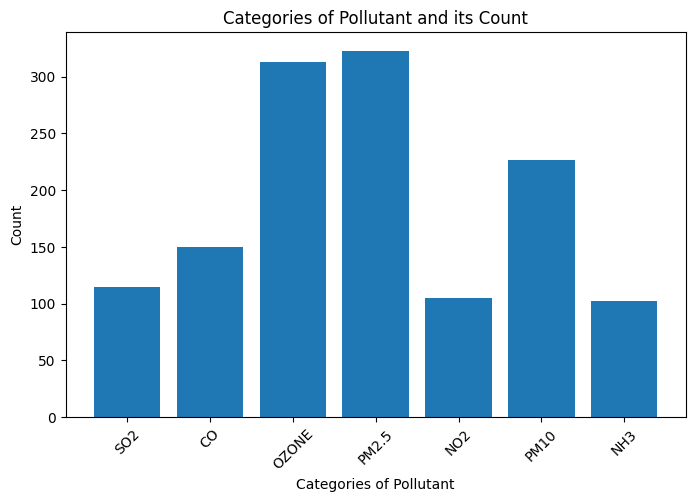

In [10]:
plt.figure(figsize=(8, 5))
plt.title('Categories of Pollutant and its Count')
plt.bar(df['pollutant_id'], df['pollutant_avg'])
plt.xlabel('Categories of Pollutant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The above figure plots the average of different categories of pollutants that are present in the air and their count. 
It shows that the air has mostly **PM2.5** pollutants.

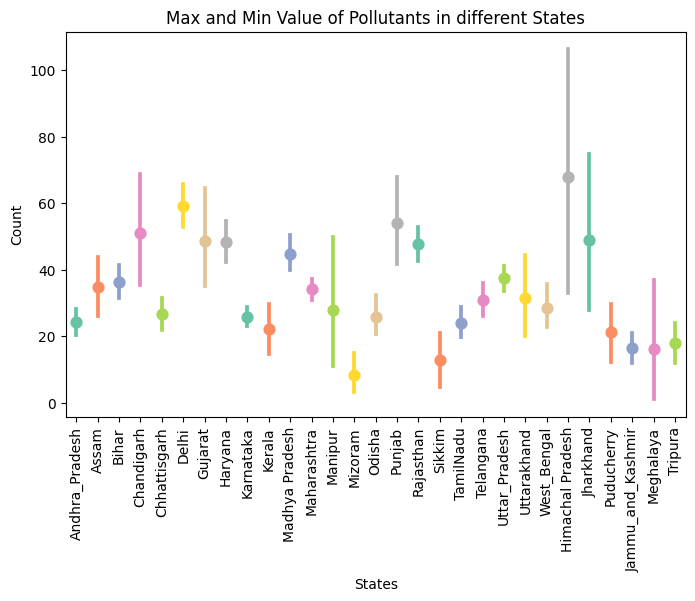

In [25]:
plt.figure(figsize=(8, 5))
plt.title('Max and Min Value of Pollutants in different States')

# df_long = pd.melt(df, id_vars=df['state'], value_vars=df['pollutant_min'], var_name='type', value_name='value')
sns.pointplot(data=df, x=df['state'], y=df['pollutant_avg'], palette='Set2')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

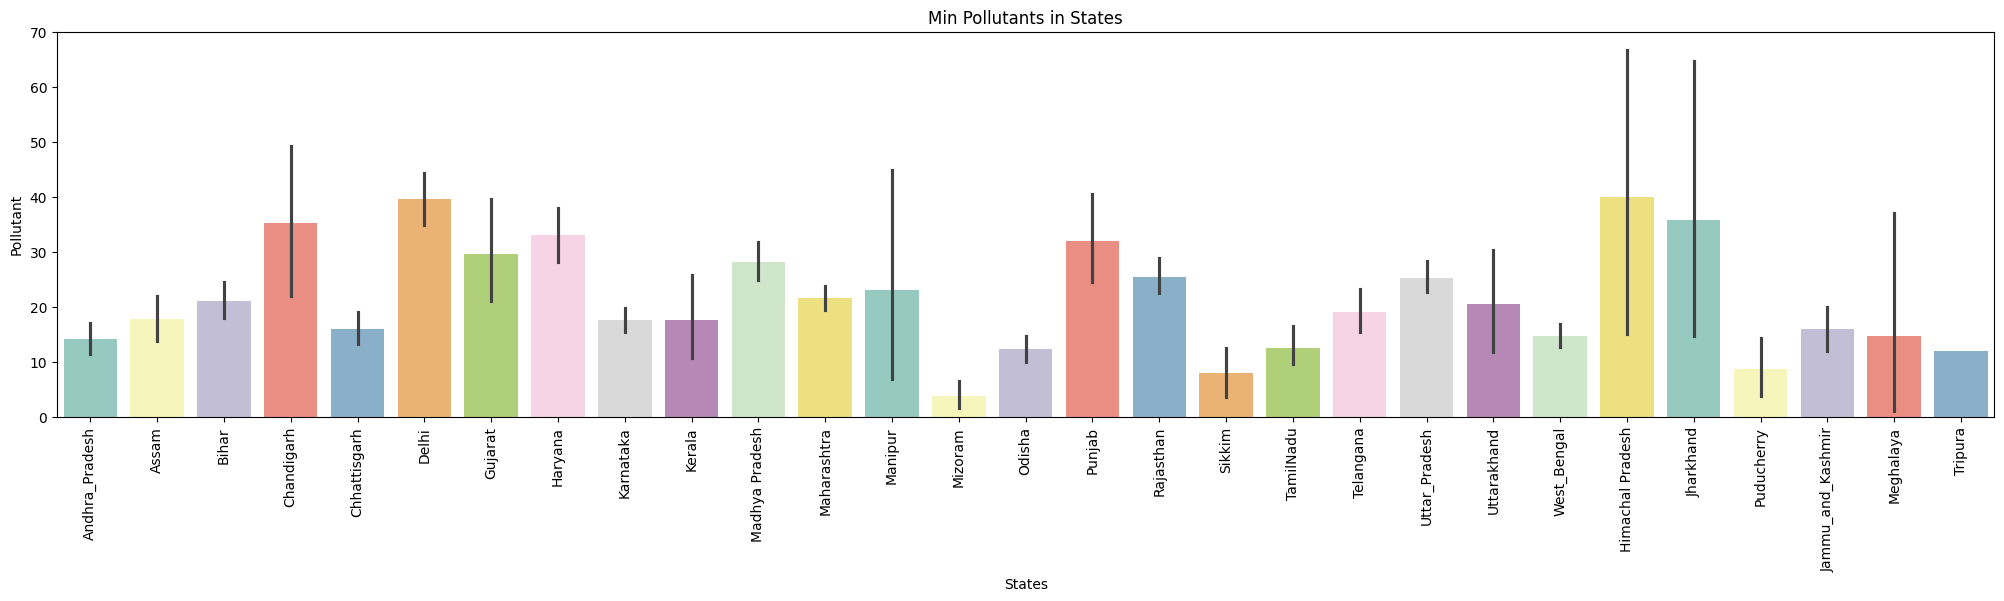

In [43]:
plt.figure(figsize=(25,5))
plt.title('Min Pollutants in States')
sns.barplot(data=df, x=df['state'], y=df['pollutant_min'], palette='Set3')
plt.xlabel('States')
plt.ylabel('Pollutant')
plt.xticks(rotation=90)
plt.show()

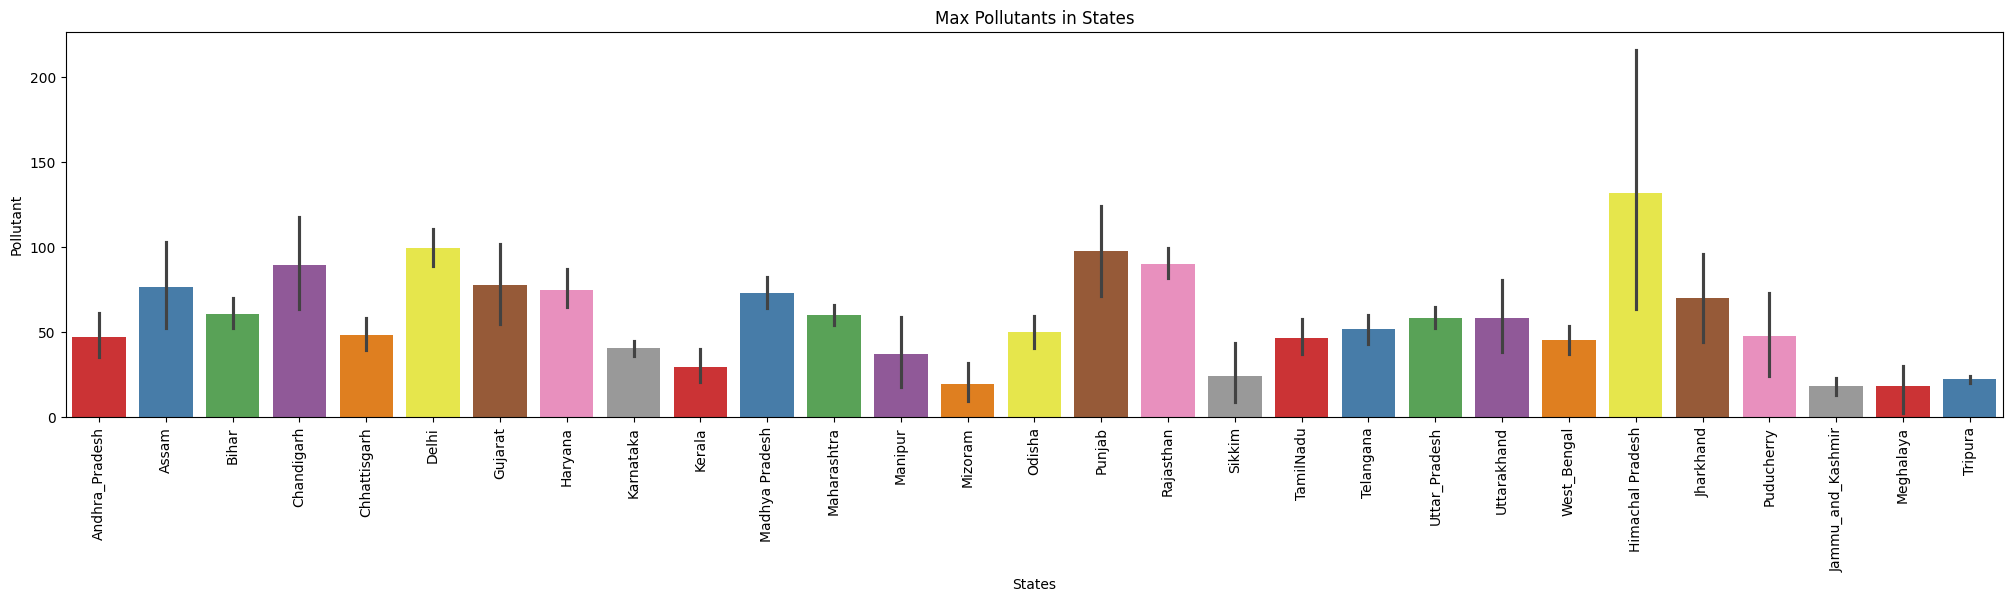

In [44]:
plt.figure(figsize=(25,5))
plt.title('Max Pollutants in States')
sns.barplot(data=df, x=df['state'], y=df['pollutant_max'], palette='Set1')
plt.xlabel('States')
plt.ylabel('Pollutant')
plt.xticks(rotation=90)
plt.show()